# Multi Inputs using Fuctioncal API
- Input1 : (10,)
    - Dense Layers
- Input2 : (25, 25, 3)
    - Conv2D Layers
- Concatenate : [Output of Input1, Output of Input2]
    - Dense Layers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
from IPython.core.display import display, HTML
warnings.filterwarnings('ignore')
display(HTML('<style>.container {width : 100%}</style>'))

<br/>
<br/>
<br/>
<br/>

### Data
- length : 100
- X1 shape : (100, 10)
- X2 shape : (100, 25, 25, 3)
- y shape : (100,)

In [2]:
nums = 100

np.random.seed(42)

X1 = np.random.rand(nums, 10)
X2 = np.random.rand(nums, 25, 25, 3)
y = np.random.rand(nums)

X1.shape, X2.shape, y.shape

((100, 10), (100, 25, 25, 3), (100,))

<br/>
<br/>
<br/>
<br/>

### Modeling
- X1 : Dense Layers
- X2 : Conv2D Layers

In [3]:
from tensorflow.keras import models, layers

#
# Dense Layer Part
#

dense_input = layers.Input(shape = (10,))
hidden1 = layers.Dense(32, activation = 'relu')(dense_input)
hidden1 = layers.Dense(64, activation = 'relu')(hidden1)
dense_output = layers.Dense(64, activation = 'relu')(hidden1)

dense_model = models.Model(dense_input, dense_output)


#
# Conv2D Layer Part
#

cnn_input = layers.Input(shape = (25, 25, 3))
hidden2 = layers.Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu')(cnn_input)
hidden2 = layers.MaxPool2D(2)(hidden2)
hidden2 = layers.Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu')(hidden2)
hidden2 = layers.MaxPool2D(2)(hidden2)
cnn_output = layers.Flatten()(hidden2)

cnn_model = models.Model(cnn_input, cnn_output)


#
# concatenate
#

concat = layers.concatenate([dense_model.output, cnn_model.output])
hidden3 = layers.Dense(128, activation = 'relu')(concat)
output = layers.Dense(1)(hidden3)

model = models.Model([dense_input, cnn_input], output)

model.compile(loss = 'mean_squared_error',
              optimizer = 'adam')

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 25, 25, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 25, 25, 32)   896         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 12, 12, 32)   0           conv2d[0][0]                     
____________________________________________________________________________________________

<br/>
<br/>
<br/>
<br/>

### Plot Model

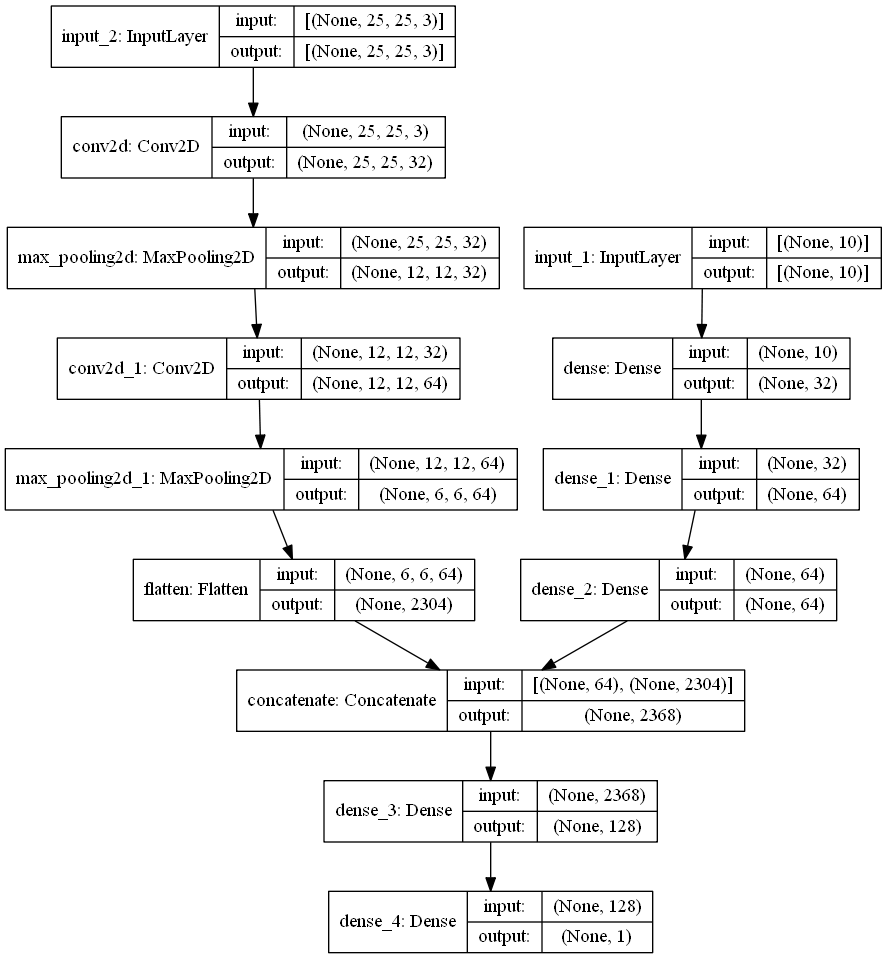

In [4]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

<br/>
<br/>
<br/>
<br/>

### Train Model
- parameters
    - x : [X1, X2] # multi inputs
    - y : y

In [5]:
history = model.fit([X1, X2], y,
                    epochs = 20,
                    batch_size = 8)

Epoch 1/20
13/13 [==============================] - 1s 8ms/step - loss: 0.3101
Epoch 2/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0880
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 0.1030
Epoch 4/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0845
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0806
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0596
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 8/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0303
Epoch 9/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0192
Epoch 10/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0078
Epoch 11/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 12/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 13/20
13/13 [==============================